<a href="https://colab.research.google.com/github/rasenani/Quantum-computing-by-programming/blob/basics-of-quantum-circuit/Lab_01_Intuition_for_unitary_transformation_and_mapping_in_a_quantum_circuit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### In this notebook, we try to understand how we can get the unitary matrix equivalent of a certain quantum circuit and the vice versa.

In [ ]:
# Necessary installations
!pip install qiskit[visualization] #Installs qiskit with all the basic visualization toolse including pylatexenc

In [ ]:
# Let's import qiskit and make sure we have the latest version (2.1.1)
import qiskit
print(f"Qiskit version: {qiskit.__version__}")

Qiskit version: 2.1.1


Make sure that you have version 2.1.1 so that no dependency trouble occurs while running the following code blocks.




In [ ]:
# Necessary imports
from qiskit import QuantumCircuit,transpile
import numpy as np
from qiskit.quantum_info import Statevector,Operator

###Part-01:  
The following quantum circuit `qc` is a **Bell state generator**. A Hadamard gate is applied to qubit `q0` to introduce superposition, followed by a CNOT gate with `q0` as control and `q1` as target. This sequence entangles the two qubits.

The mapping from the **initial computational basis states** to the **Bell basis states** (as observed from the final statevector) is as follows:

- $|00\rangle \ \longrightarrow \ |\Phi^{+}\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$
- $|01\rangle \ \longrightarrow \ |\Phi^{-}\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$
- $|10\rangle \ \longrightarrow \ |\Psi^{+}\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$
- $|11\rangle \ \longrightarrow \ |\Psi^{-}\rangle = \frac{1}{\sqrt{2}}(|10\rangle - |01\rangle)$

This transformation defines a unitary that maps the standard basis to the **Bell basis**, often used in quantum communication protocols like quantum teleportation and superdense coding.


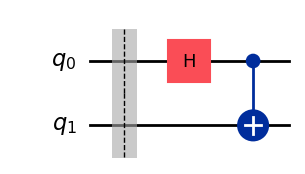

In [ ]:
qc = QuantumCircuit(2)
# By choice of applying the XGate you can initialize whichever of the four computational basis states
# qc.x(0)
# qc.x(1)
qc.barrier()

qc.h(0)
qc.cx(0,1)
qc.draw(output='mpl')

In [ ]:
Statevector(qc).draw('latex')

<IPython.core.display.Latex object>

In [ ]:
# Get the unitary matrix
unitary = Operator(qc).data

# Display it
print(np.round(unitary, 3))

[[ 0.707+0.j  0.707+0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j  0.707+0.j]
 [ 0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j]]


###Part-02:  
Now we try to do the reverse of the above. Here we are given an Unitary matrix, U. We are required to generate a Quantum Circuit equivalent to the unitary transformation defined by this particular unitary matrix.

In [ ]:
U = (1 / np.sqrt(2)) * np.array([
    [1, 1, 0, 0],
    [0, 0, 1, 1],
    [0, 0, 1, -1],
    [1, -1, 0, 0],
])

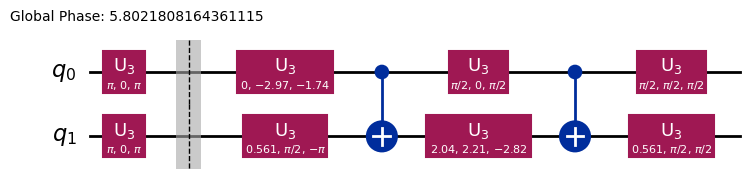

In [ ]:
qc_final = QuantumCircuit(2)
qc_final.x(0)
qc_final.x(1)
qc_final.barrier()

qc_final.unitary(Operator(U), [0,1])
qc_optimized = transpile(qc_final, basis_gates = ['u3','cx'], optimization_level = 3)
qc_optimized.draw(output='mpl')

In [ ]:
Statevector(qc_optimized).draw('latex')

<IPython.core.display.Latex object>

Now complete the mapping in this case. One has been done as a sample:
- $|00\rangle \ \longrightarrow \ |\rangle = \frac{1}{\sqrt{2}}(|\rangle + |\rangle)$
- $|01\rangle \ \longrightarrow \ |\rangle = \frac{1}{\sqrt{2}}(|\rangle + |\rangle)$
- $|10\rangle \ \longrightarrow \ |\rangle = \frac{1}{\sqrt{2}}(|\rangle + |\rangle)$
- $|11\rangle \ \longrightarrow \ -|\Psi^{-}\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$

###Part-03:
This will be the most playful part of this notebook. Here you get to find out your own unitary transformation i.e. the matrix U_you and will find the equivalent Quantum Circuit for it. Make sure that your circuit implements the following mapping form the **Computational Basis** to the **Bell Basis**.  
- $|00\rangle \ \longrightarrow \ |\Phi^{+}\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$
- $|01\rangle \ \longrightarrow \ |\Psi^{-}\rangle = \frac{1}{\sqrt{2}}(|10\rangle - |01\rangle)$
- $|10\rangle \ \longrightarrow \ |\Phi^{-}\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$
- $|11\rangle \ \longrightarrow \ |\Psi^{+}\rangle = \frac{1}{\sqrt{2}}(|10\rangle + |01\rangle)$

In [ ]:
qc_you = QuantumCircuit(2)
# Todo
# Your code here
# Todo
qc_you.barrier()

# Todo
# Your code here
# Todo
# qc_you_optimized.draw(output = 'mpl')

In [ ]:
# Statevector(qc_you_optimized).draw('latex')

**Hints**  
1. Understand the Part-01: Why does the mapping get implemented in that way
2. Remember that qiskit employs the little endian approach. Keep that in mind when you read the statevector
3. Find out how to determine the unitary transformation from an input state to an output state

###**Lab-01: Intuition for unitary transformation and mapping in a quantum circuit**  
Created by: Animesh Banik  
Date: 07/31/2025  
####Reach out for any further clarification:  
e-mail: animesh4physics@gmail.com  
linkedin: https://www.linkedin.com/in/animesh-banik-276a5a2aa/